### 1. 데이터 분석과 시각화

#### a. 데이터 파일 확인

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/kaggle-survey-2017/freeformResponses.csv
/kaggle/input/kaggle-survey-2017/schema.csv
/kaggle/input/kaggle-survey-2017/RespondentTypeREADME.txt
/kaggle/input/kaggle-survey-2017/multipleChoiceResponses.csv
/kaggle/input/kaggle-survey-2017/conversionRates.csv


In [2]:
%matplotlib inline

import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# schema.csv - multipleChoice, freeformResponses의 각 열 이름에 해당하는 질문
question=pd.read_csv("../input/kaggle-survey-2017/schema.csv")
question.shape

(290, 3)

In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# multipleChoiceResponses.csv - 선다형 객관식 문제에 대한 응답
## encoding은 single-bite encoding // UTF-8은 multibyte encoding
mcq=pd.read_csv("../input/kaggle-survey-2017/multipleChoiceResponses.csv",encoding="ISO-8859-1",low_memory=False)
mcq.shape

(16716, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

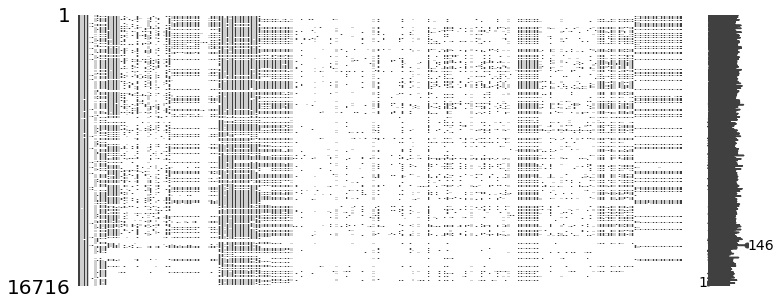

In [8]:
# missingno - NaN 데이터 시각화 (널값들이 많아서 내용 파악이 어려움)

import missingno as msno

msno.matrix(mcq,figsize=(12,5))

#### b. 설문통계

mcq에 대해 실행

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

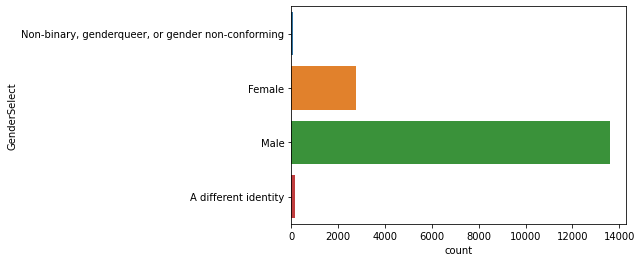

In [9]:
# 성별 - 남성 비율이 압도적으로 많다
sns.countplot(y='GenderSelect',data=mcq)

In [10]:
# 국가별 응답수
con_df=pd.DataFrame(mcq['Country'].value_counts())
con_df['국가']=con_df.index
con_df.columns=['응답 수','국가']
con_df=con_df.reset_index().drop('index',axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [11]:
# 연령 - 연령대는 20대부터 급격히 늘어나며 30대가 가장 많음
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

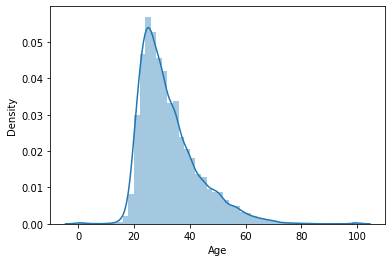

In [12]:
sns.distplot(mcq['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

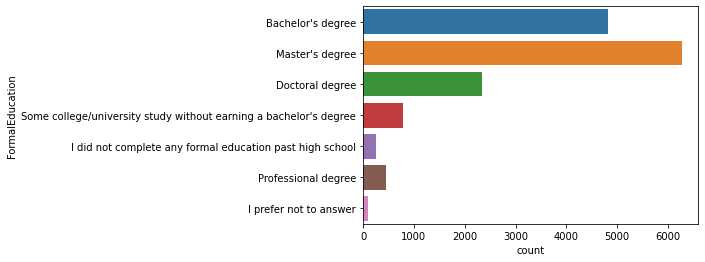

In [13]:
# 학력 - 석사 >> 학사 >> 박사 >> 그외
sns.countplot(y='FormalEducation',data=mcq)

In [14]:
# 전공 - 컴공 >> 수학 >> 공학 >> 전기공학
mcq_major_count=pd.DataFrame(mcq['MajorSelect'].value_counts())
mcq_major_percent=pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True)) ## 비율로 나타냄
mcq_major_df=mcq_major_count.merge(mcq_major_percent,left_index=True,right_index=True)
mcq_major_df.columns=['응답 수','비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

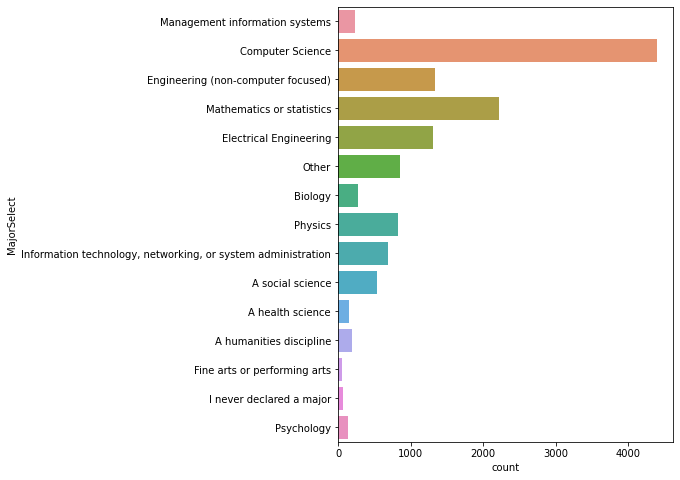

In [15]:
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect',data=mcq)

In [16]:
# 취업 여부 - 취업 >> 미취업+프리랜서
mcq_es_count=pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_percent=pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df=mcq_es_count.merge(mcq_es_percent,left_index=True,right_index=True)
mcq_es_df.columns=['응답 수','비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

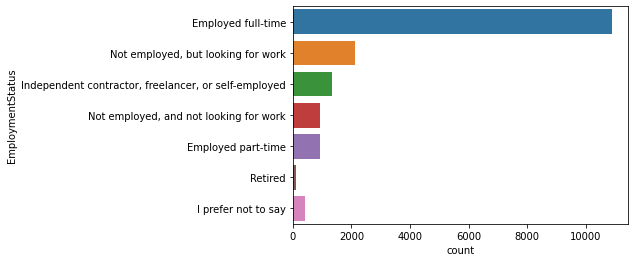

In [17]:
sns.countplot(y='EmploymentStatus',data=mcq)

<AxesSubplot:xlabel='count', ylabel='Tenure'>

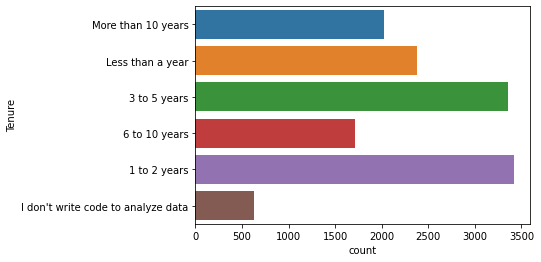

In [18]:
# 프로그래밍 경험 - 5년 이상이 대다수
sns.countplot(y='Tenure',data=mcq)

한국 위주로 살펴봤다.

The number of interviewees in Korea  194


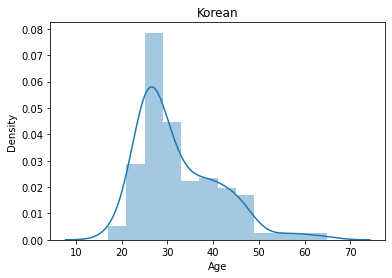

In [19]:
# 한국인 연령 - 20대 중후반부터 급격히 증가
korea=mcq.loc[mcq['Country']=='South Korea']
print('The number of interviewees in Korea ',str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [20]:
# 한국인 성별 - 남성이 여성보다 많다.
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

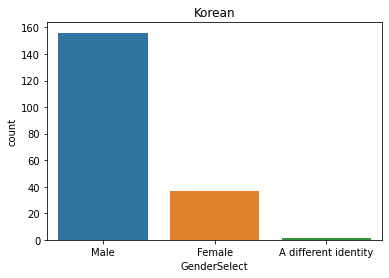

In [21]:
sns.countplot(x='GenderSelect',data=korea)
plt.title("Korean")

Text(0.5, 1.0, 'Korean Male')

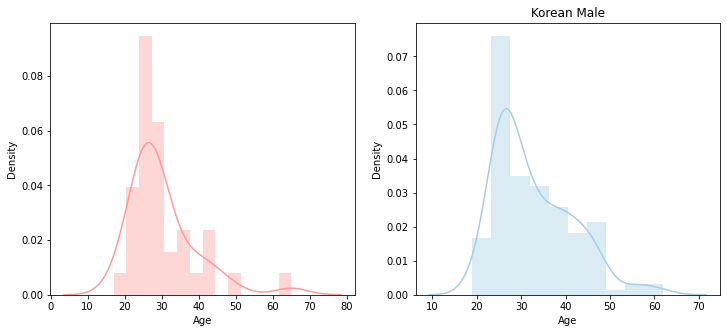

In [22]:
# 한국인 성별 간 연령대 비교 - 비슷함
figure,(ax1,ax2)=plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
            norm_hist=False,color=sns.color_palette('Paired')[4],ax=ax1)
plt.title('Korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
            norm_hist=False,color=sns.color_palette('Paired')[0],ax=ax2)
plt.title("Korean Male")

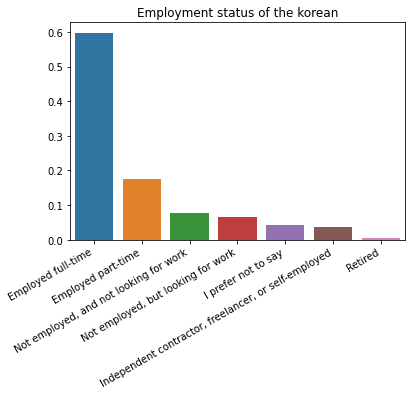

In [23]:
# 한국인 취업 여부 - 취업 >> 실직 + 프리랜서
sns.barplot(x=korea['EmploymentStatus'].unique(),y=(korea['EmploymentStatus'].value_counts()/len(korea)))
plt.xticks(rotation=30,ha='right')
plt.title("Employment status of the korean")
plt.ylabel('')
plt.show()

In [24]:
full_time=mcq.loc[mcq['EmploymentStatus']=='Employed full-time']
print(full_time.shape)

looking_for_job=mcq.loc[mcq['EmploymentStatus']=='Not employed, but looking for work']
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


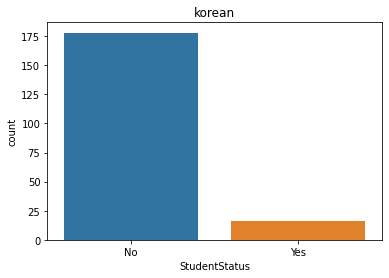

In [25]:
# 한국인 학생 신분 여부 - 학생 아닌 사람들이 대다수
korea['StudentStatus']=korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus',data=korea)
plt.title('korean')
plt.show()

<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

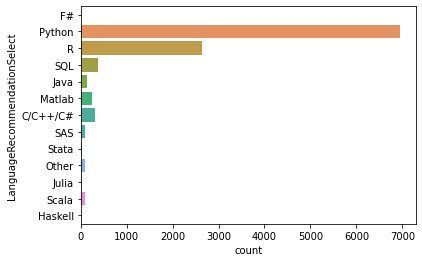

In [26]:
# 선호하는 언어 - 파이썬 >> R
sns.countplot(y='LanguageRecommendationSelect',data=mcq)

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

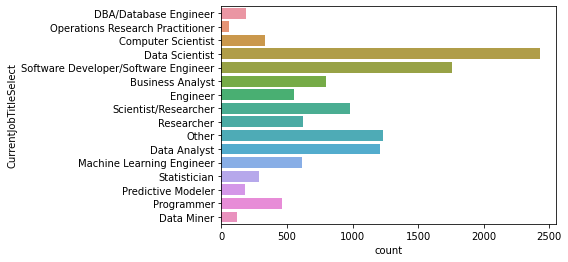

In [27]:
# 전문가와 강사들이 선호하는 언어
## 현재 하고 있는 일 - 데이터사이언티스트 >> 엔지니어
sns.countplot(y=mcq['CurrentJobTitleSelect'])

(7158, 228)


<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

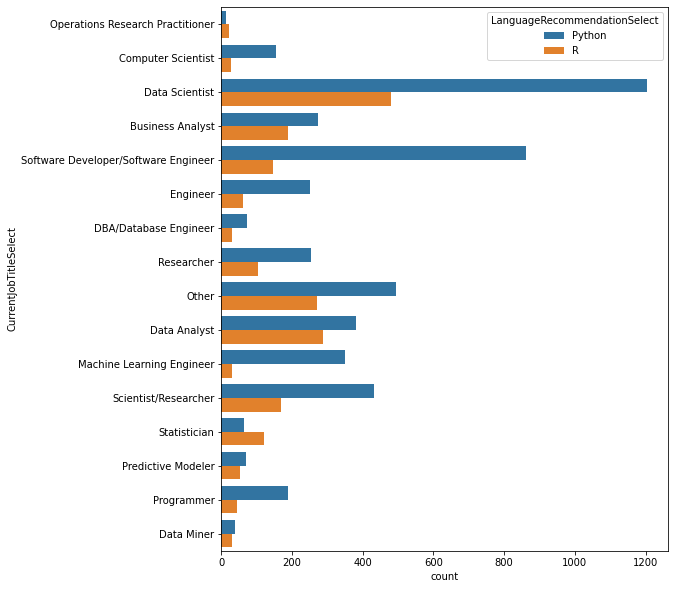

In [28]:
## 현재 하고 있는 일에 응답한 사람들 중 Python과 R을 사용하는 사람
## - 통계학자들은 R을 많이 사용하지만, 그외엔 모두 Python 사용
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
    (mcq['LanguageRecommendationSelect'] == 'Python') | (
        mcq['LanguageRecommendationSelect'] == 'R'))]
print(data.shape)

plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', 
              hue='LanguageRecommendationSelect', 
              data=data)

In [29]:
# 데이터사이언스 툴 (20개) - TensorFlow >> Python > R
mcq_ml_tool_count=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent=pd.DataFrame(mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df=mcq_ml_tool_count.merge(mcq_ml_tool_percent,left_index=True,right_index=True).head(20)
mcq_ml_tool_df.columns=['응답 수','비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

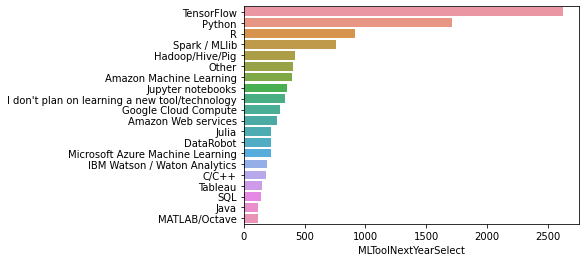

In [30]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index,x=data)

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

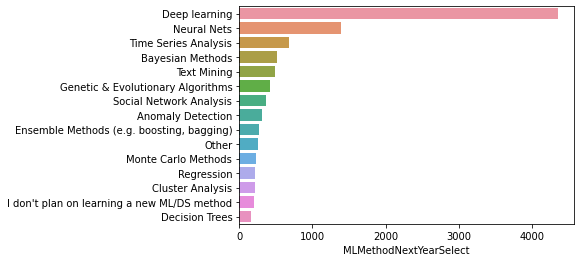

In [31]:
# 주목할만한 Data Science Methods(15개) - 딥러닝 >> 인공신경망 > 시계열
data=mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index,x=data)

In [32]:
# 데이터 사이언스 배울 곳(15개) - Kaggle > Online course > Stack Overflow
mcq['LearningPlatformSelect']=mcq['LearningPlatformSelect'].astype('str').apply(lambda x:x.split(','))
s=mcq.apply(lambda x:pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1,drop=True)
s.name='Platform'

<AxesSubplot:xlabel='Platform'>

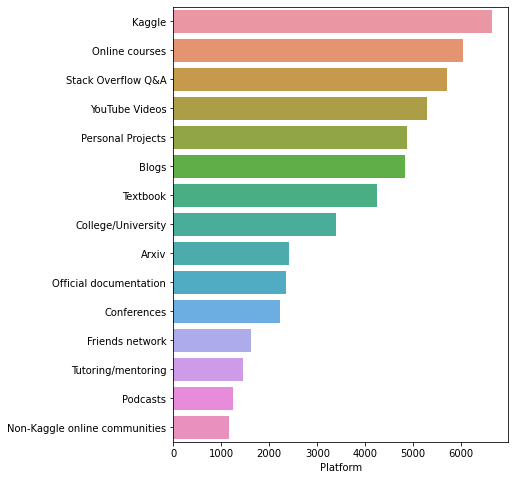

In [33]:
plt.figure(figsize=(6,8))
data=s[s!='nan'].value_counts().head(15)
sns.barplot(y=data.index,x=data)

In [34]:
# 학습 관련된 설문내용과 누구에게 물어봤는지
qc=question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [35]:
use_features=[x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]

<AxesSubplot:>

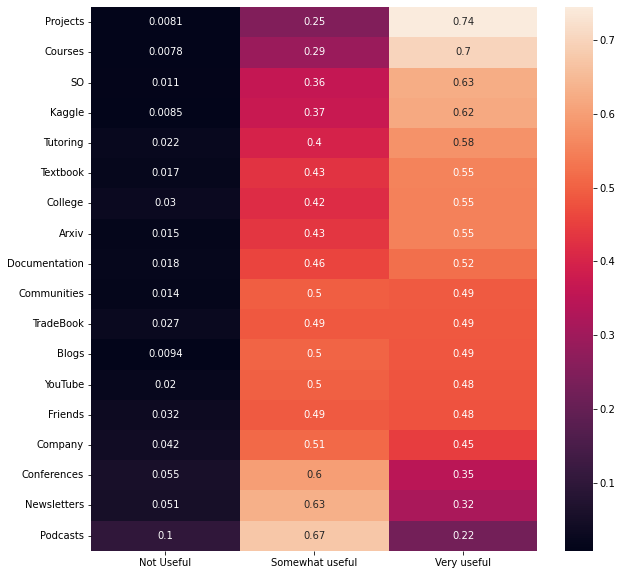

In [36]:
# 학습 플랫폼과 유용함에 대한 연관성 
fdf={}
for feature in use_features:
    a=mcq[feature].value_counts()
    a=a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]]=a
fdf=pd.DataFrame(fdf).transpose().sort_values('Very useful',ascending=False)

## 상관관계 - Projects > Courses > SO > Kaggle
plt.figure(figsize=(10,10))
sns.heatmap(fdf.sort_values("Very useful",ascending=False),annot=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Projects'),
  Text(1, 0, 'Courses'),
  Text(2, 0, 'SO'),
  Text(3, 0, 'Kaggle'),
  Text(4, 0, 'Tutoring'),
  Text(5, 0, 'Textbook'),
  Text(6, 0, 'College'),
  Text(7, 0, 'Arxiv'),
  Text(8, 0, 'Documentation'),
  Text(9, 0, 'Communities'),
  Text(10, 0, 'TradeBook'),
  Text(11, 0, 'Blogs'),
  Text(12, 0, 'YouTube'),
  Text(13, 0, 'Friends'),
  Text(14, 0, 'Company'),
  Text(15, 0, 'Conferences'),
  Text(16, 0, 'Newsletters'),
  Text(17, 0, 'Podcasts')])

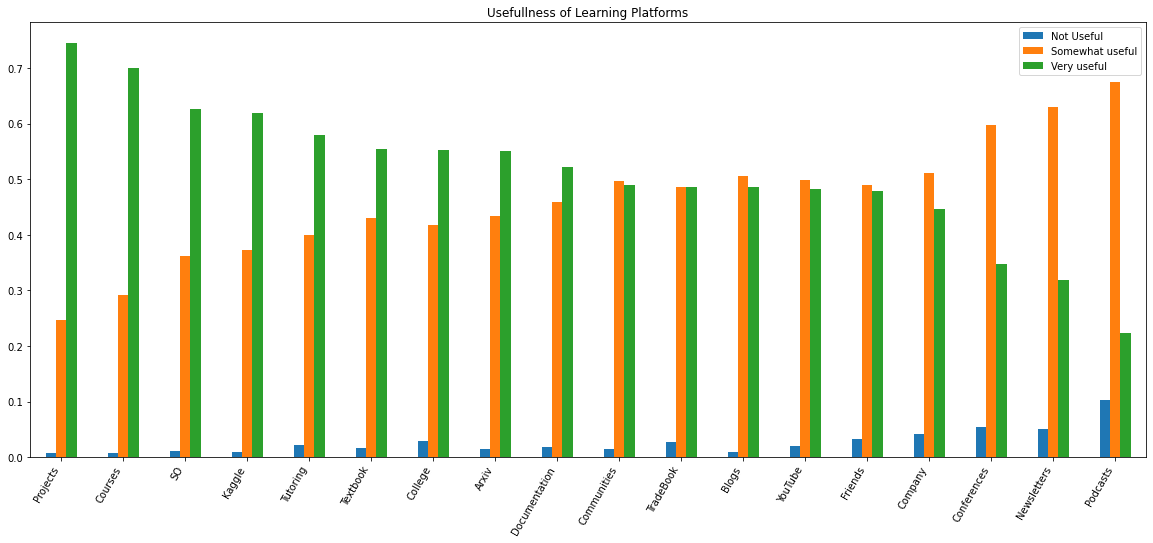

In [37]:
## 각 플랫폼별로 그룹화해 살펴봄
fdf.plot(kind='bar',figsize=(20,8),title="Usefullness of Learning Platforms")
plt.xticks(rotation=60,ha='right')

In [38]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

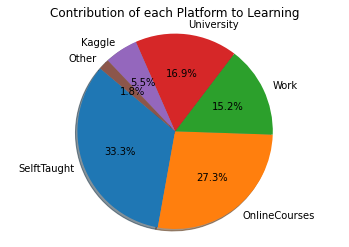

In [39]:
# 학습 플랫폼 별 도움이 되는 정도 - 독학 >> 온라인코스 > 대학 >> 일
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()

## 파이차트로 확인
cdf = pd.Series(cdf)
plt.pie(cdf,labels=cdf.index,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

In [40]:
## 개인프로젝트나 학습용 데이터 출처
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(lambda x: x.split(','))
q = mcq.apply(lambda x: pd.Series(x['PublicDatasetsSelect']),axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'
q=q[q!='nan'].value_counts()
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


<AxesSubplot:title={'center':'Most Popular Dataset Platforms'}, xlabel='courses'>

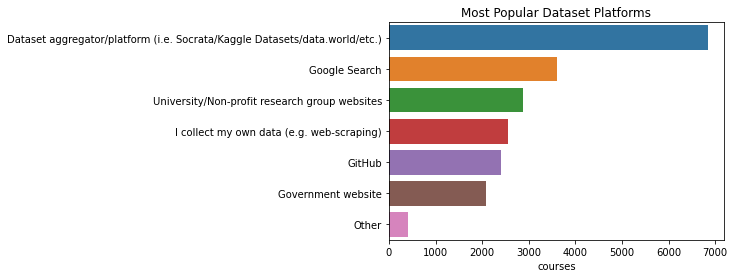

In [41]:
## barplot으로 확인 - Kaggle이나 Socrata >> Google Search
plt.title("Most Popular Dataset Platforms")
sns.barplot(y=q.index, x=q)

In [42]:
## 개인 프로젝트에서 공개데이터셋 다루는데 어려운 점 - 데이터 다루는 일 > 데이터 크기
ff = pd.read_csv('../input/kaggle-survey-2017/freeformResponses.csv',encoding="ISO-8859-1",low_memory=False)
ff.shape

(16716, 62)

In [43]:
## 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [44]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name='응답 수'
pd.DataFrame(ppcff)

,응답 수
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
dirty data,10
Data cleaning,10
-,9
Size,9


In [45]:
## 워드클라우드 이용해 나타내
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

def displayWordCloud(data = None, backgroundcolor = 'white', width=1200, height=600 ):
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                          background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

In [46]:
ppc = ff['PersonalProjectsChallengeFreeForm'].dropna()

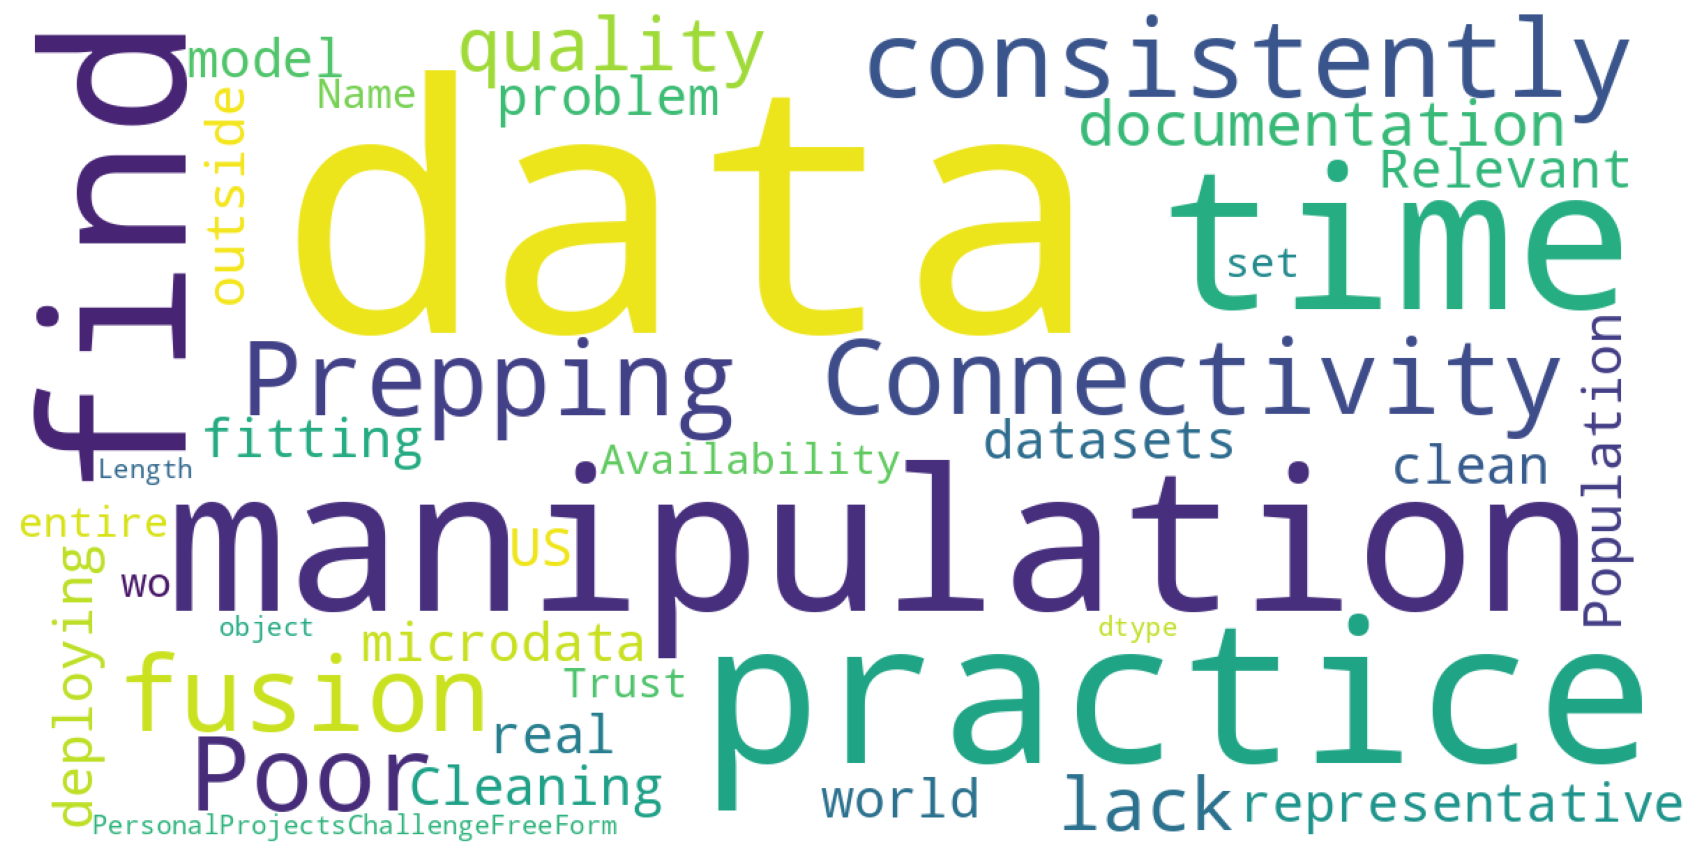

CPU times: user 1.31 s, sys: 332 ms, total: 1.64 s
Wall time: 1.17 s


In [47]:
%time displayWordCloud(''.join(str(ppc)))

<AxesSubplot:title={'center':'Most Popular Course Platforms'}, xlabel='courses'>

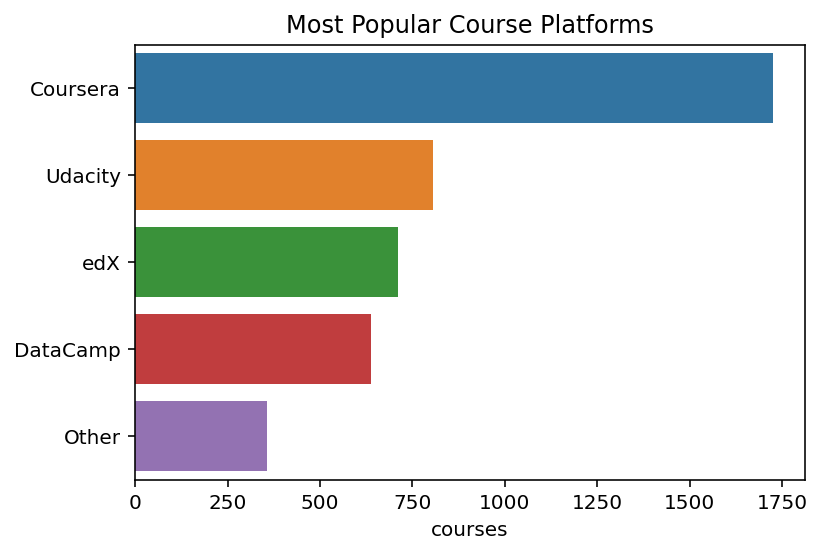

In [48]:
# 인기있는 플랫폼 - Cousera >> Udacity > edX
mcq['CoursePlatformSelect'] = mcq['CoursePlatformSelect'].astype('str').apply(lambda x: x.split(','))
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),axis=1).stack().reset_index(level=1,drop=True)
t.name = 'courses'
t = t[t!='nan'].value_counts()

plt.title("Most Popular Course Platforms")
sns.barplot(y=t.index, x=t)

In [49]:
# 컴퓨터 사양 - 맥북 사용 >> 랩탑+클라우드
## 설문내용과 누구에게 물어봤는지
qc=question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [50]:
mcq['HardwarePersonalProjectsSelect']=mcq['HardwarePersonalProjectsSelect'].astype('str').apply(lambda x: x.split(','))
s=mcq.apply(lambda x:pd.Series(x['HardwarePersonalProjectsSelect']),axis=1).stack().reset_index(level=1,drop=True)
s.name='hardware'
s=s[s!='nan']

In [51]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


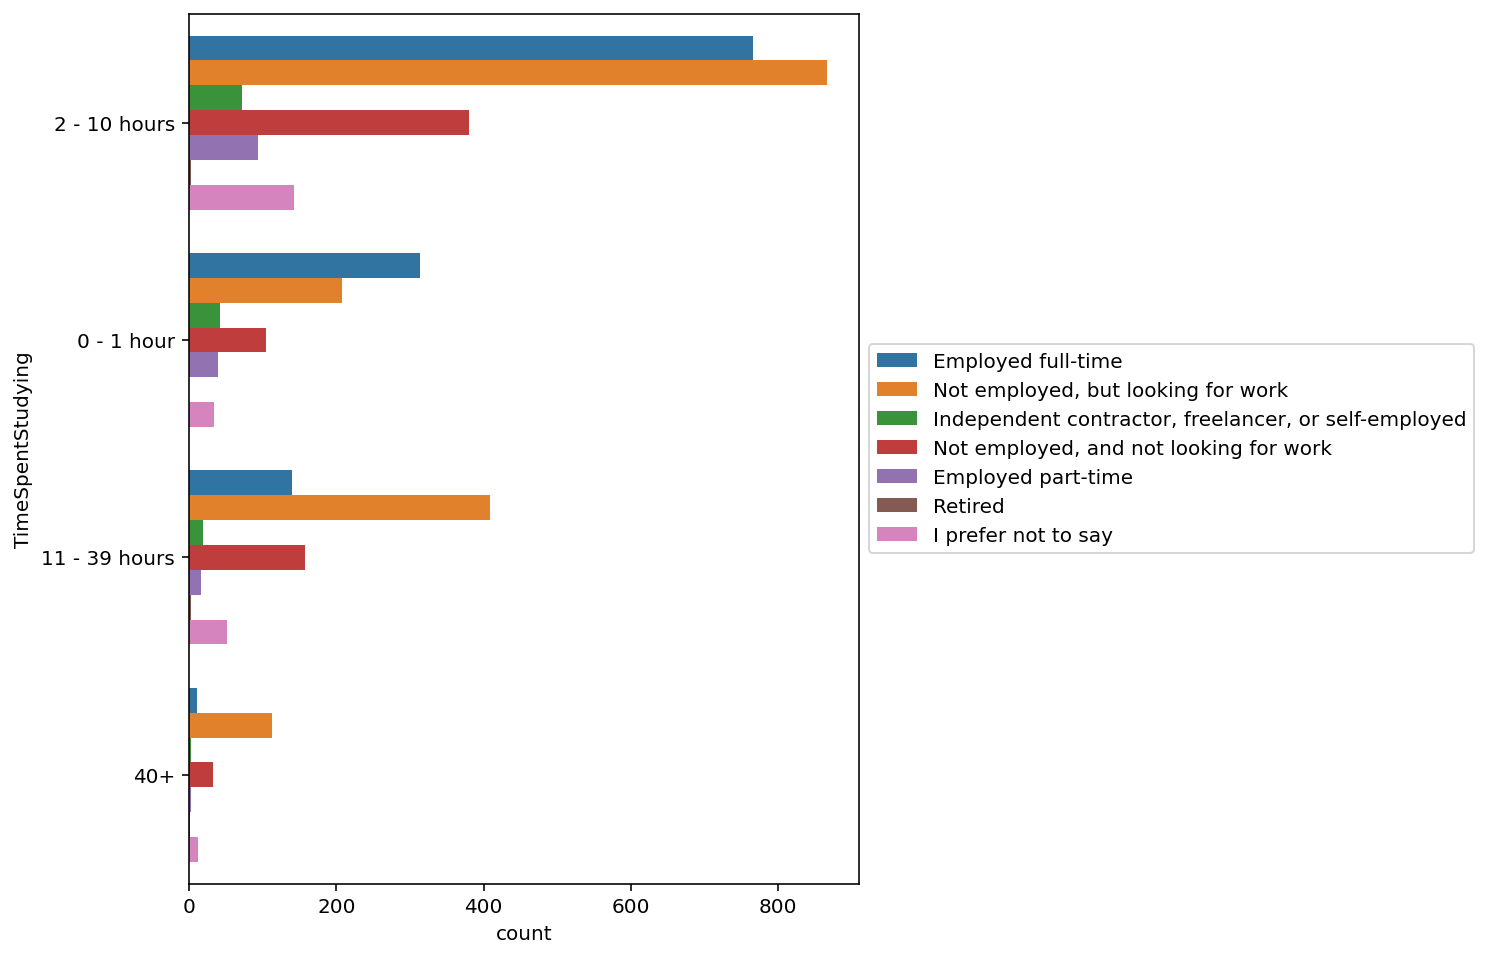

In [52]:
# 취업 여부별 공부시간
# 2~10시간 일하는 비율 : 실직자 > 풀타임 (응답자 대부분 풀타임으로 일하는 사람들)
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',data=mcq,hue='EmploymentStatus').legend(loc='center left',bbox_to_anchor=(1, 0.5))

In [53]:
full_time = mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)

looking_for_job = mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)


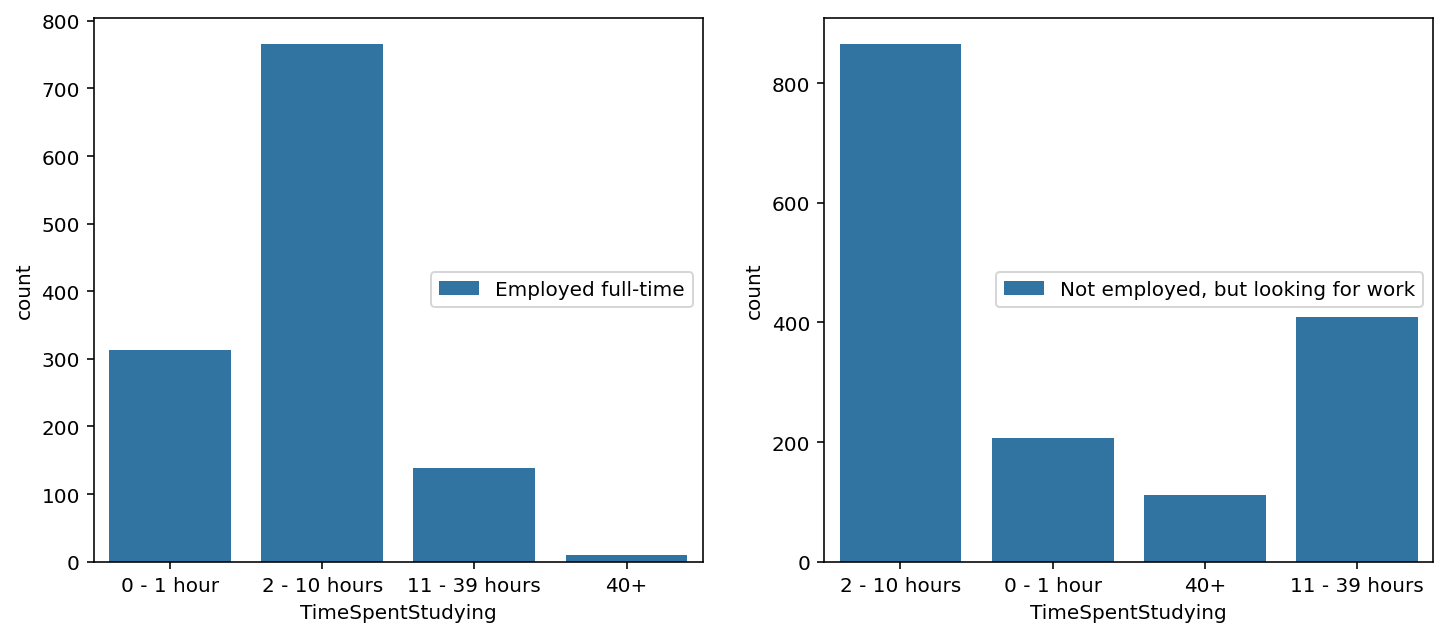

In [54]:
# 취업여부별 공부시간 비교
## 풀타임 근무자 - 2~10시간 >> 0~1시간
## 실업자 - 2~10시간 >> 11~39시간
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',data=full_time,hue='EmploymentStatus',ax=ax1).legend(loc='center right',bbox_to_anchor=(1, 0.5))
sns.countplot(x='TimeSpentStudying',data=looking_for_job,hue='EmploymentStatus', ax=ax2).legend(loc='center right',bbox_to_anchor=(1, 0.5))

<AxesSubplot:title={'center':'Most Popular Blogs and Podcasts'}, xlabel='platforms'>

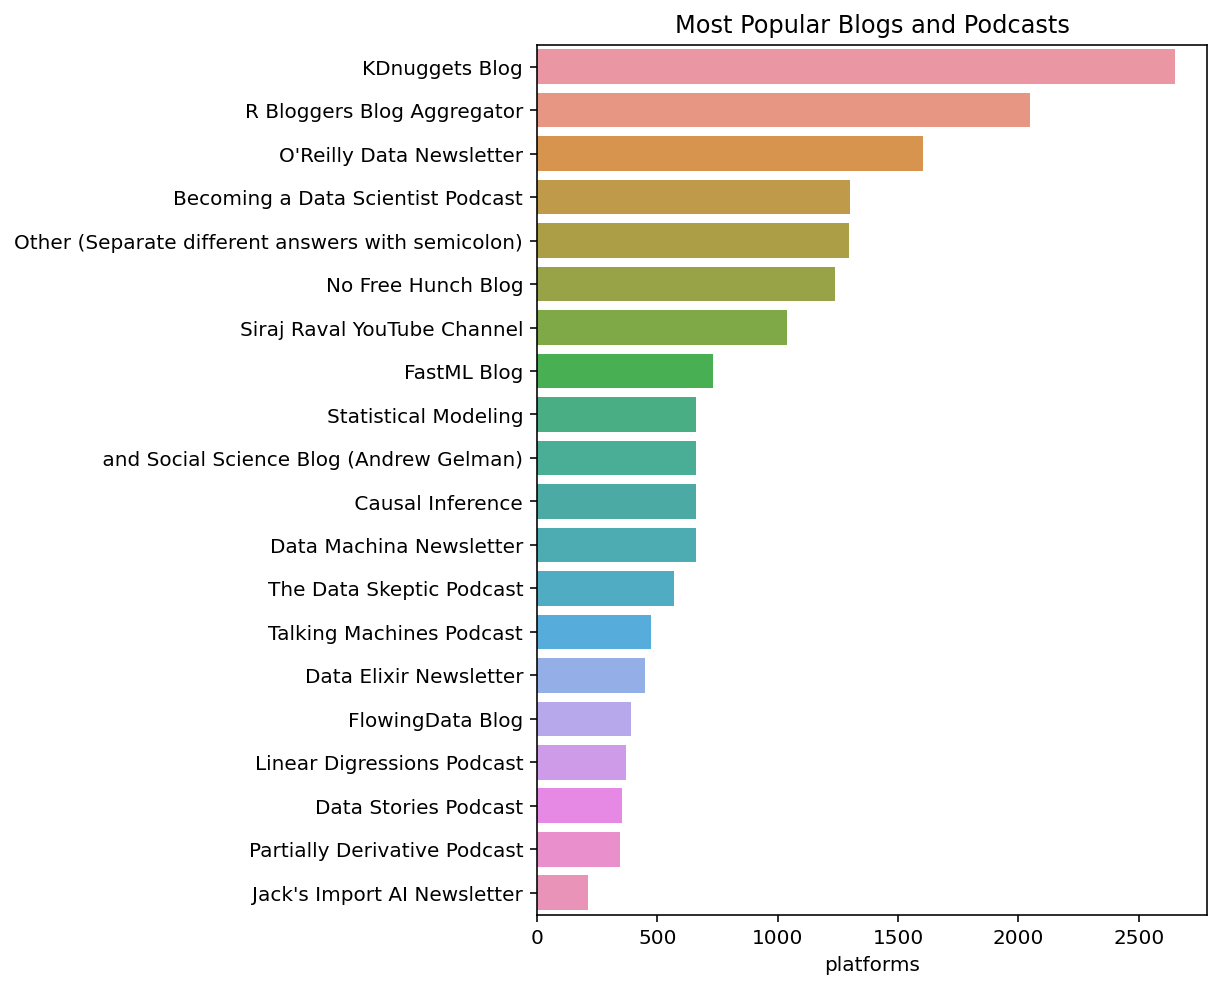

In [55]:
# 추천할만한 것(20개) - 왜 nan이 들어갔는지는 모르겠지만..
mcq['BlogsPodcastsNewslettersSelect'] = mcq['BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
s=mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),axis=1).stack().reset_index(level=1,drop=True)
s.name ='platforms'
s=s[s!='nan'].value_counts().head(20)

plt.figure(figsize=(6,8))
plt.title("Most Popular Blogs and Podcasts")
sns.barplot(y=s.index,x=s)

In [56]:
# 가장 중요하다고 생각되는 스킬
## 스킬 관련 질문 답변
job_features = [x for x in mcq.columns if x.find('JobSkillImportance')!=-1 and x.find('JobSkillImportanceOther')==-1]
job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [57]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]]=a

jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


<AxesSubplot:>

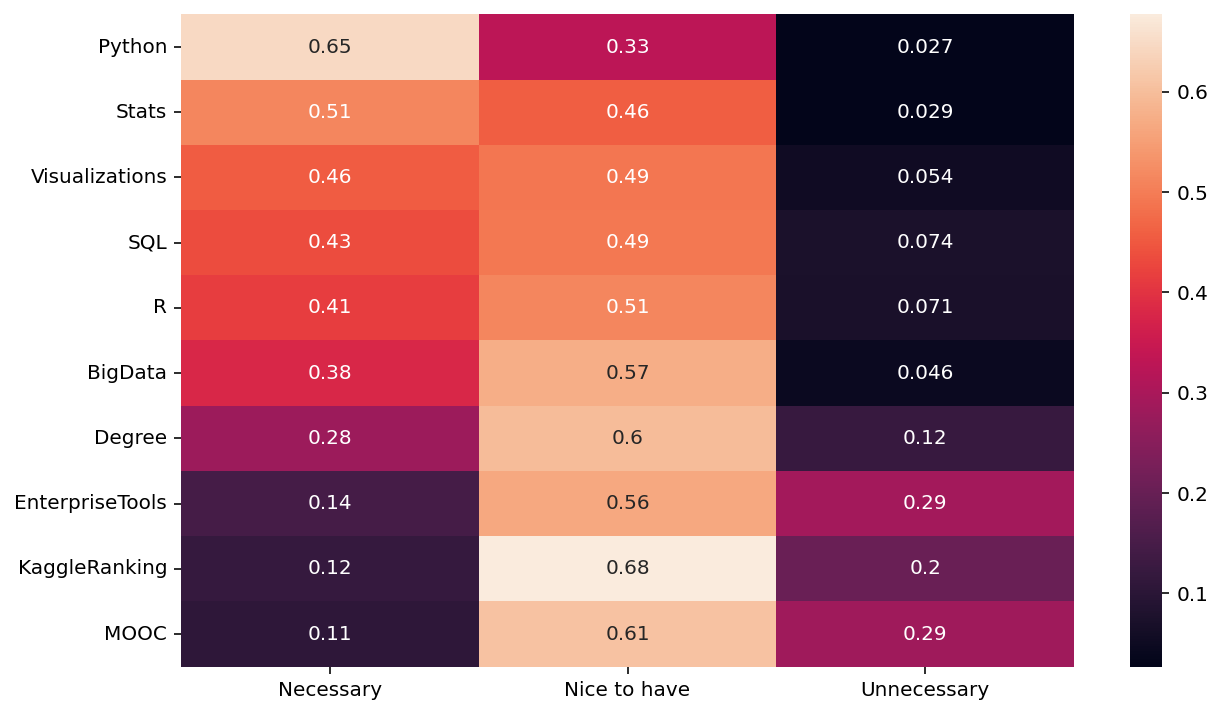

In [58]:
## 상관관계 분석 - Python, Stats, Visualization 순으로 중요도 높음
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values("Necessary",ascending=False),annot=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BigData'),
  Text(1, 0, 'Degree'),
  Text(2, 0, 'Stats'),
  Text(3, 0, 'EnterpriseTools'),
  Text(4, 0, 'Python'),
  Text(5, 0, 'R'),
  Text(6, 0, 'SQL'),
  Text(7, 0, 'KaggleRanking'),
  Text(8, 0, 'MOOC'),
  Text(9, 0, 'Visualizations')])

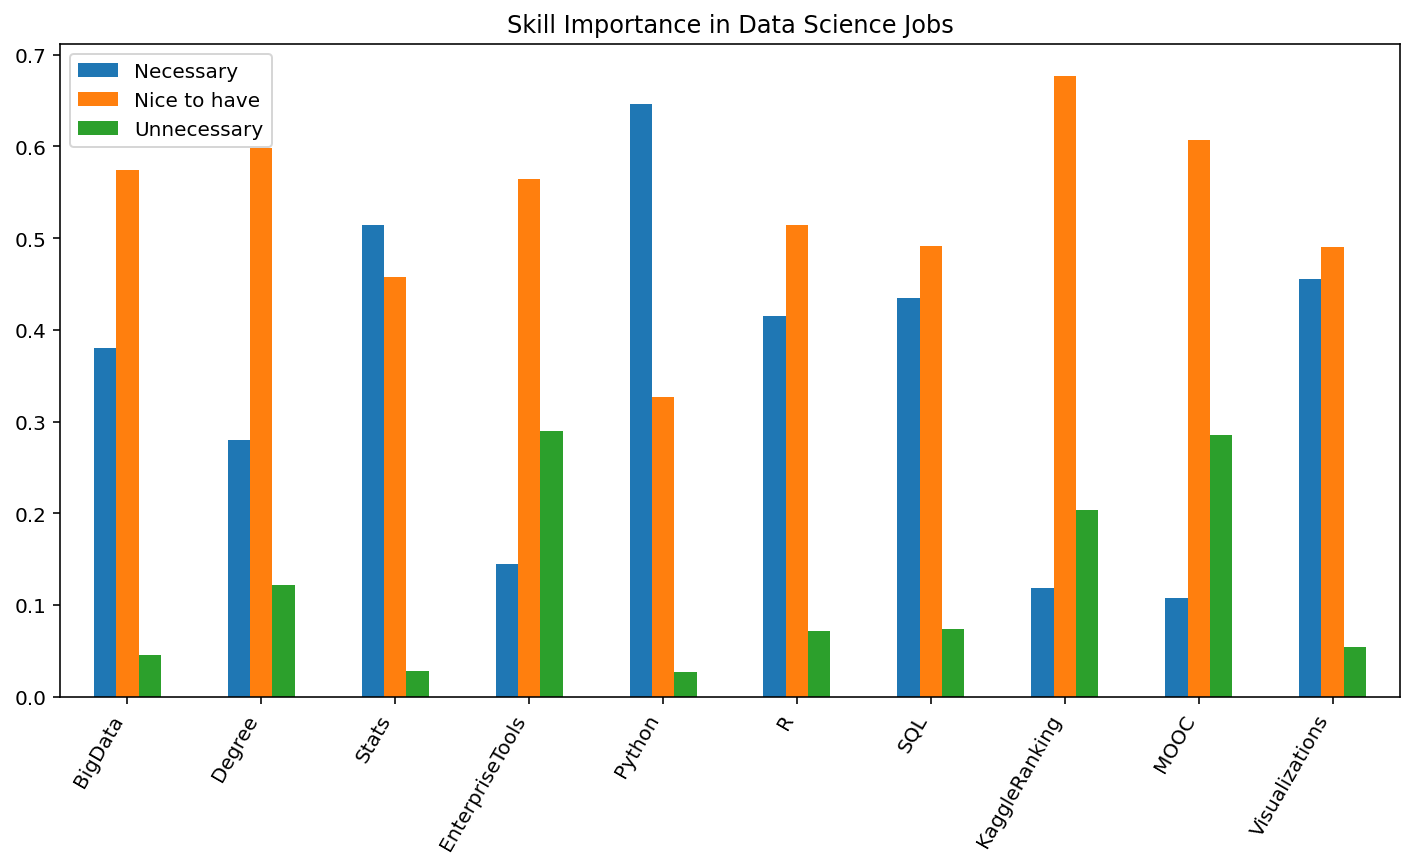

In [59]:
## 막대그래프 - 있으면 좋은 것으로 빅데이터, 학위, 툴 사용법, 캐글 랭킹 등
jdf.plot(kind='bar',figsize=(12,6), title="Skill Importance in Data Science Jobs")
plt.xticks(rotation=60,ha='right')

In [60]:
# 데이터사이언티스트의 평균 급여
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [61]:
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('../input/kaggle-survey-2017/conversionRates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)

salary = mcq[['CompensationAmount','CompensationCurrency','GenderSelect',
     'Country','CurrentJobTitleSelect']].dropna()
salary = salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [62]:
## 통계수치 확인
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

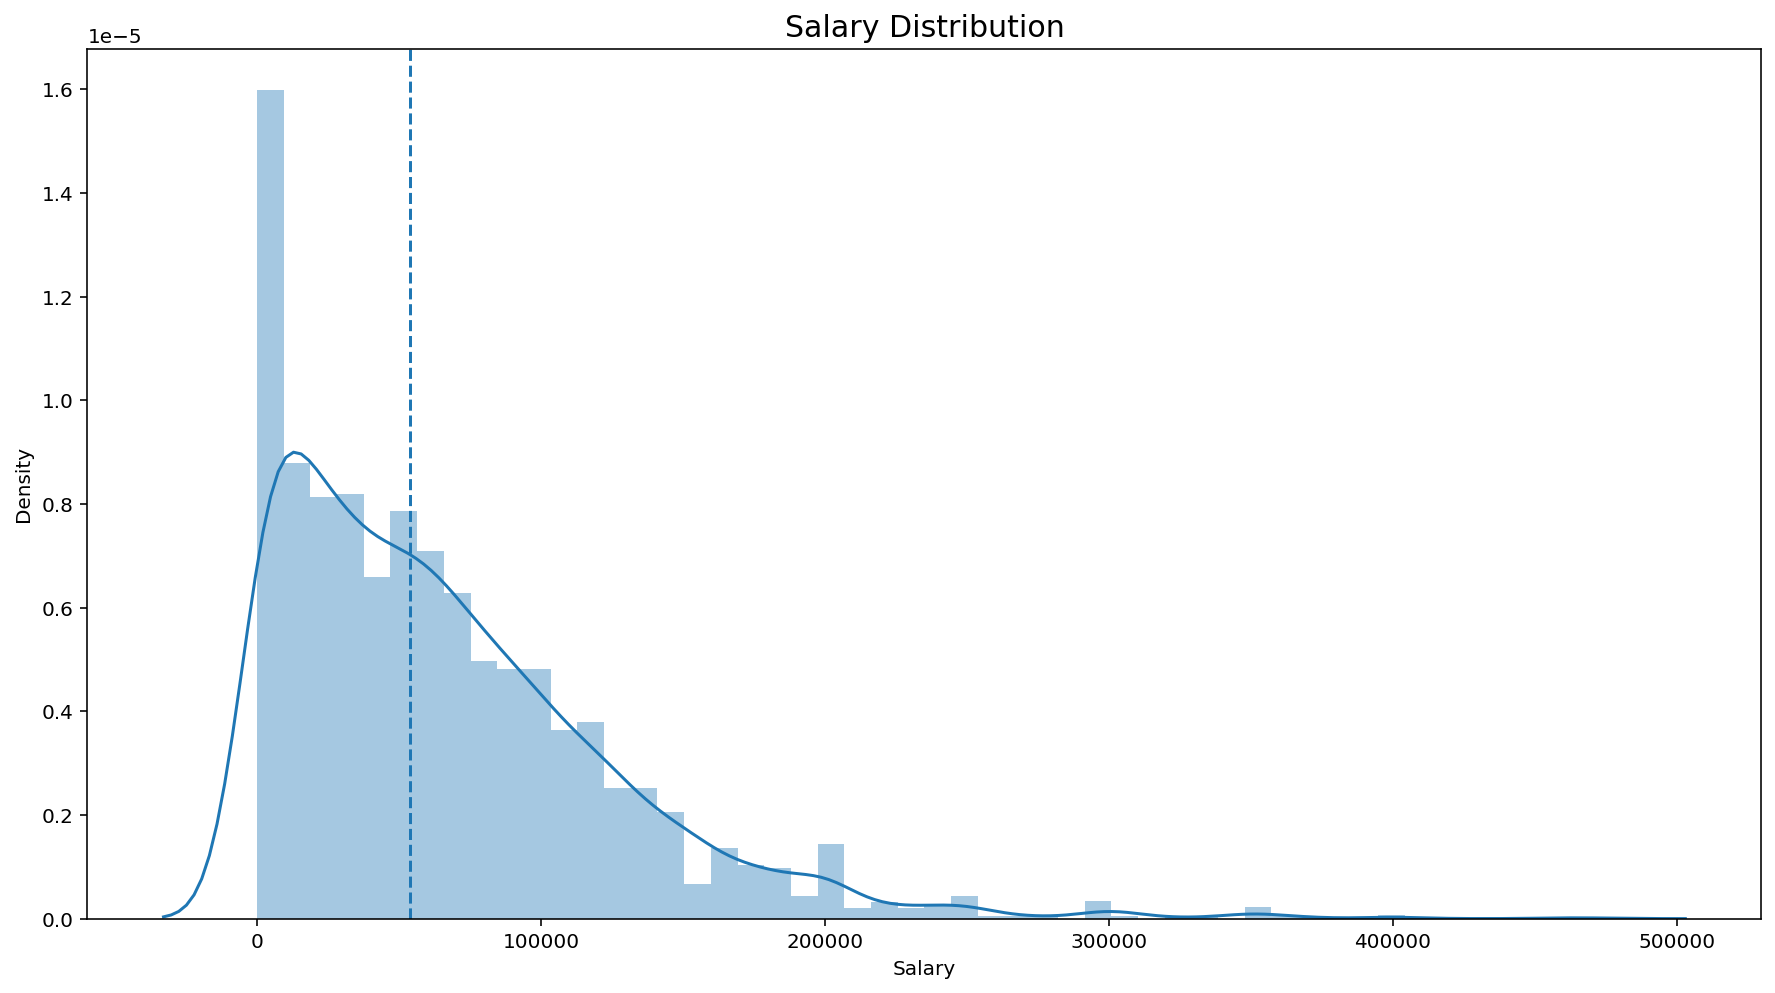

In [63]:
## 50만불 이상의 데이터 distplot
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<500000]
sns.distplot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution',size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

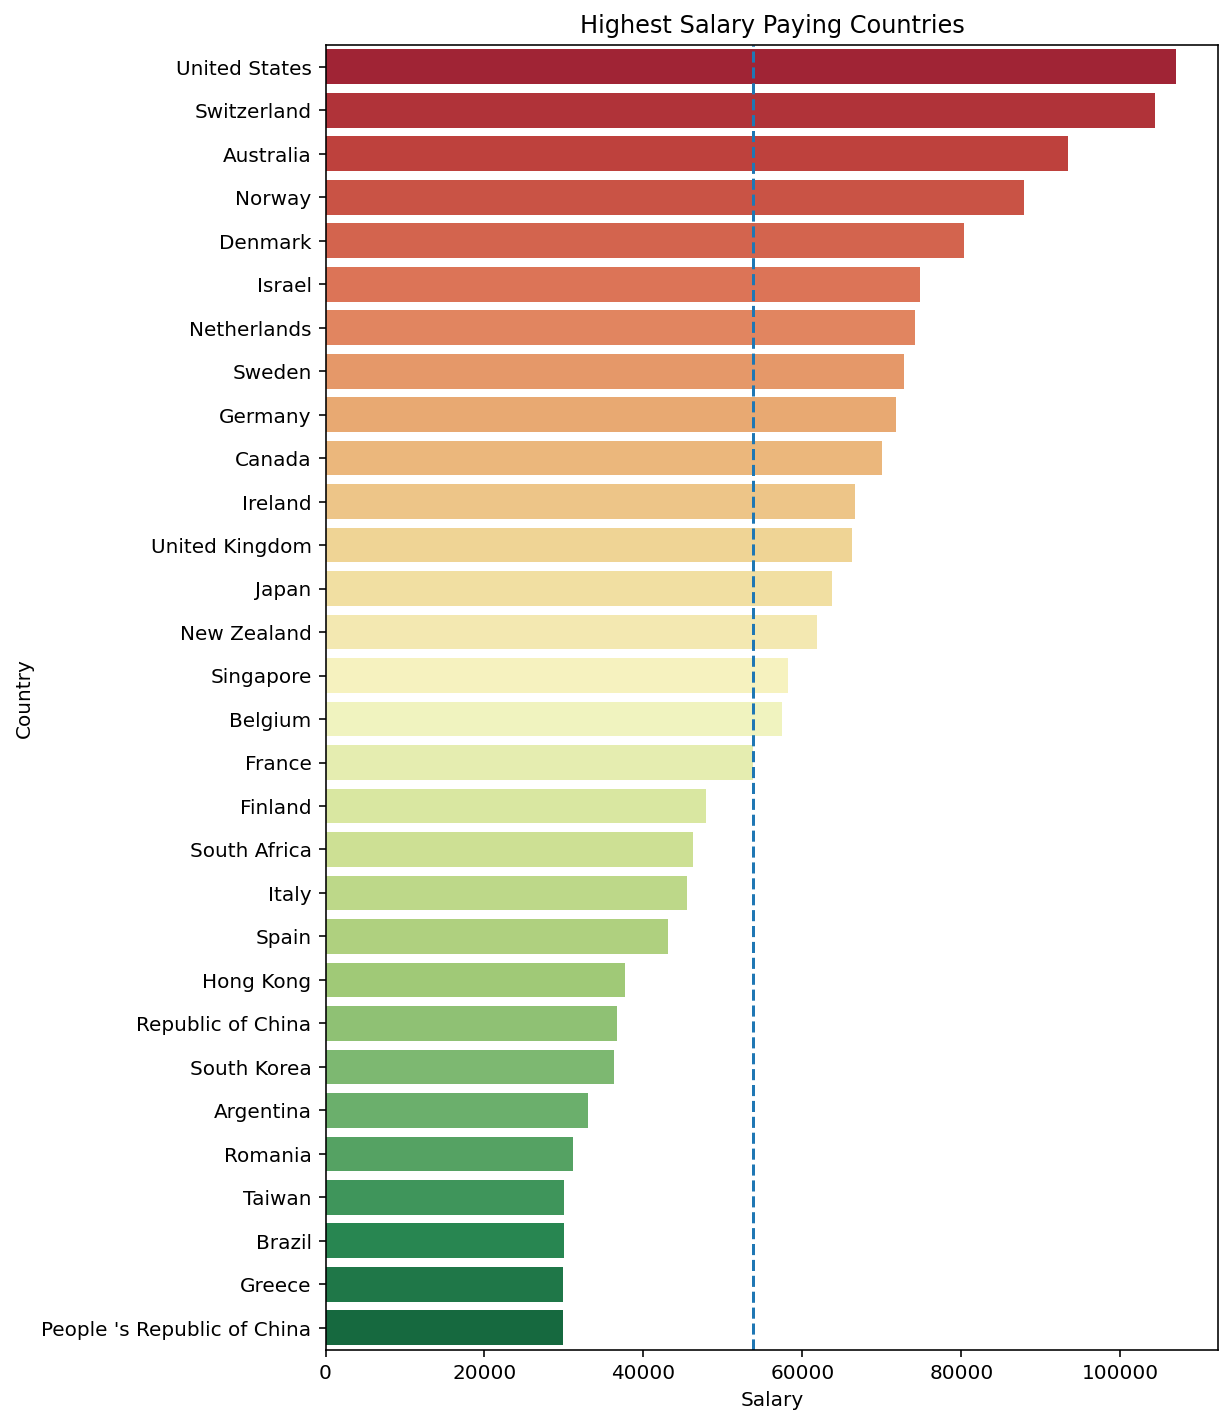

In [64]:
## 국가별 급여 비교 barplot
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()

sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

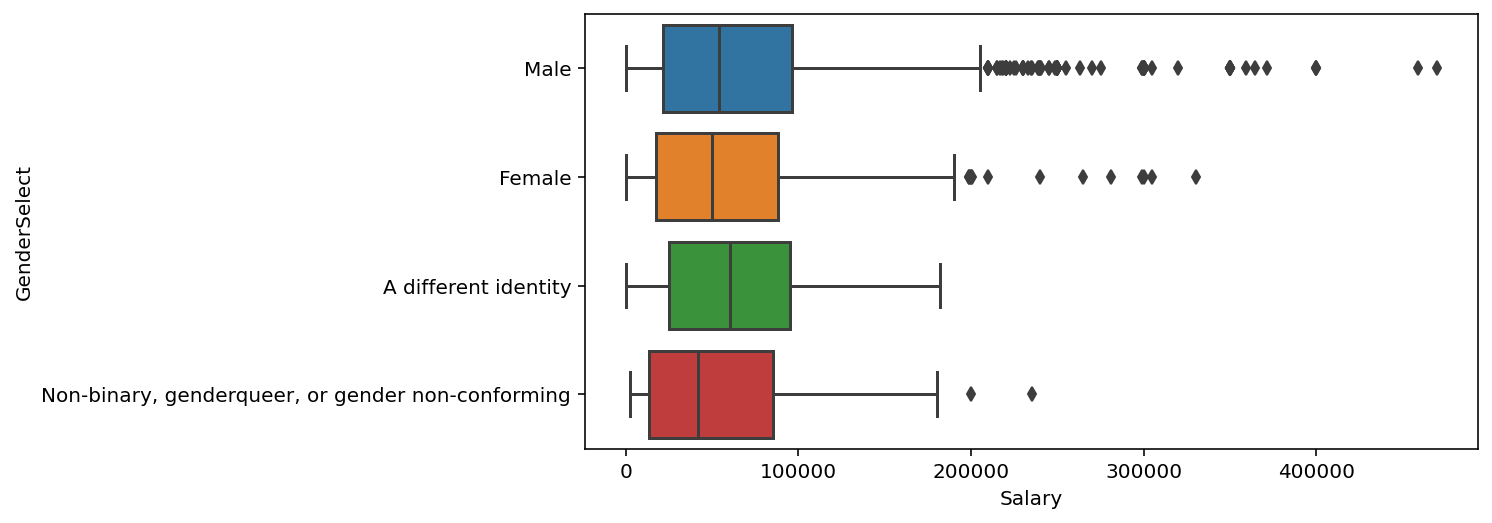

In [65]:
## 성별간 급여 비교 - 남성의 이상치 존재
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary)

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

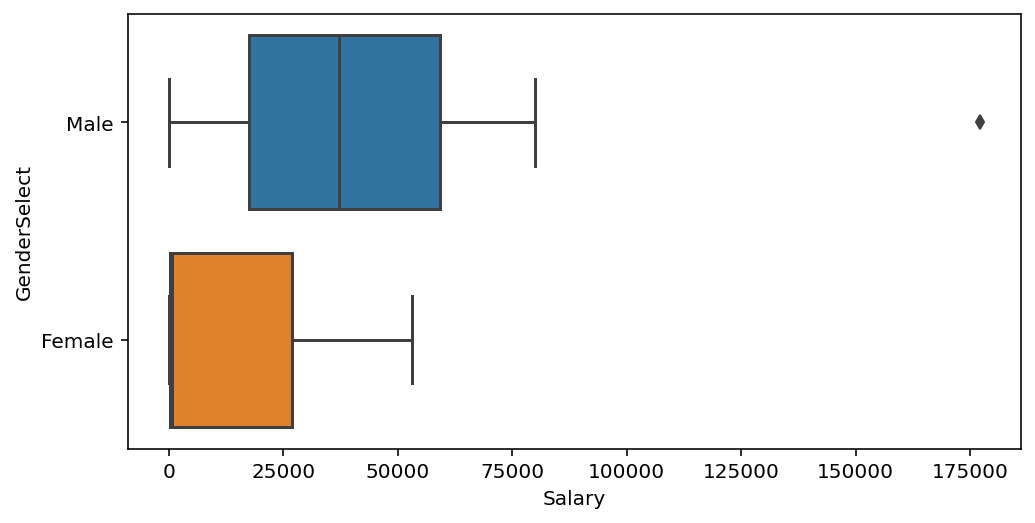

In [66]:
## 한국인 성별간 급여 비교 - 남성의 평균이 훨씬 높음
salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)

In [67]:
salary_korea.shape

(26, 8)

In [68]:
### 한국인 여성은 3명밖에 없음
salary_korea[salary_korea['GenderSelect']=='Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [69]:
### 한국인 남성 급여 통계수치
salary_korea_male = salary_korea[salary_korea['GenderSelect']=='Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



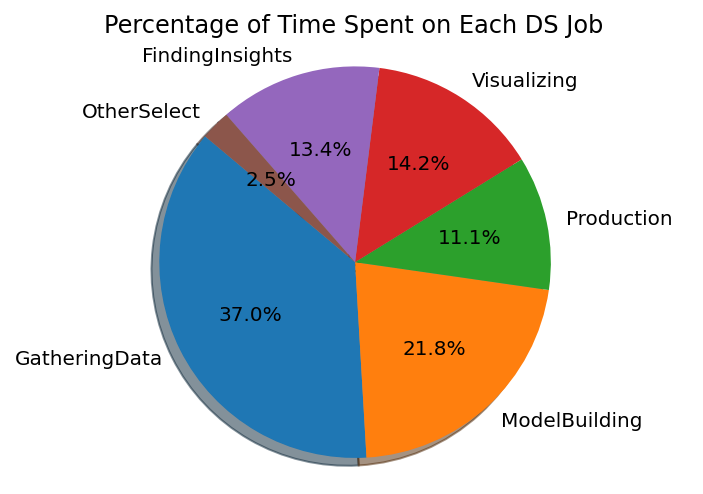

In [70]:
# 데이터 사이언스 업무에서 가장 시간이 많이 소요되는 일
# 데이터 수집 >> 모델구축 > 시각화 > 인사이트 찾기
time_features = [x for x in mcq.columns if x.find('Time')!=-1][4:10]

tdf = {}
for feature in time_features:
    tdf[feature[len('Time'):]] = mcq[feature].mean()

tdf=pd.Series(tdf)
print(tdf)
print()

## pieplot으로 표현
plt.pie(tdf, labels=tdf.index, 
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()

In [71]:
# 직업을 찾는데 가장 고려해야할 요소
## 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)
qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

<AxesSubplot:>

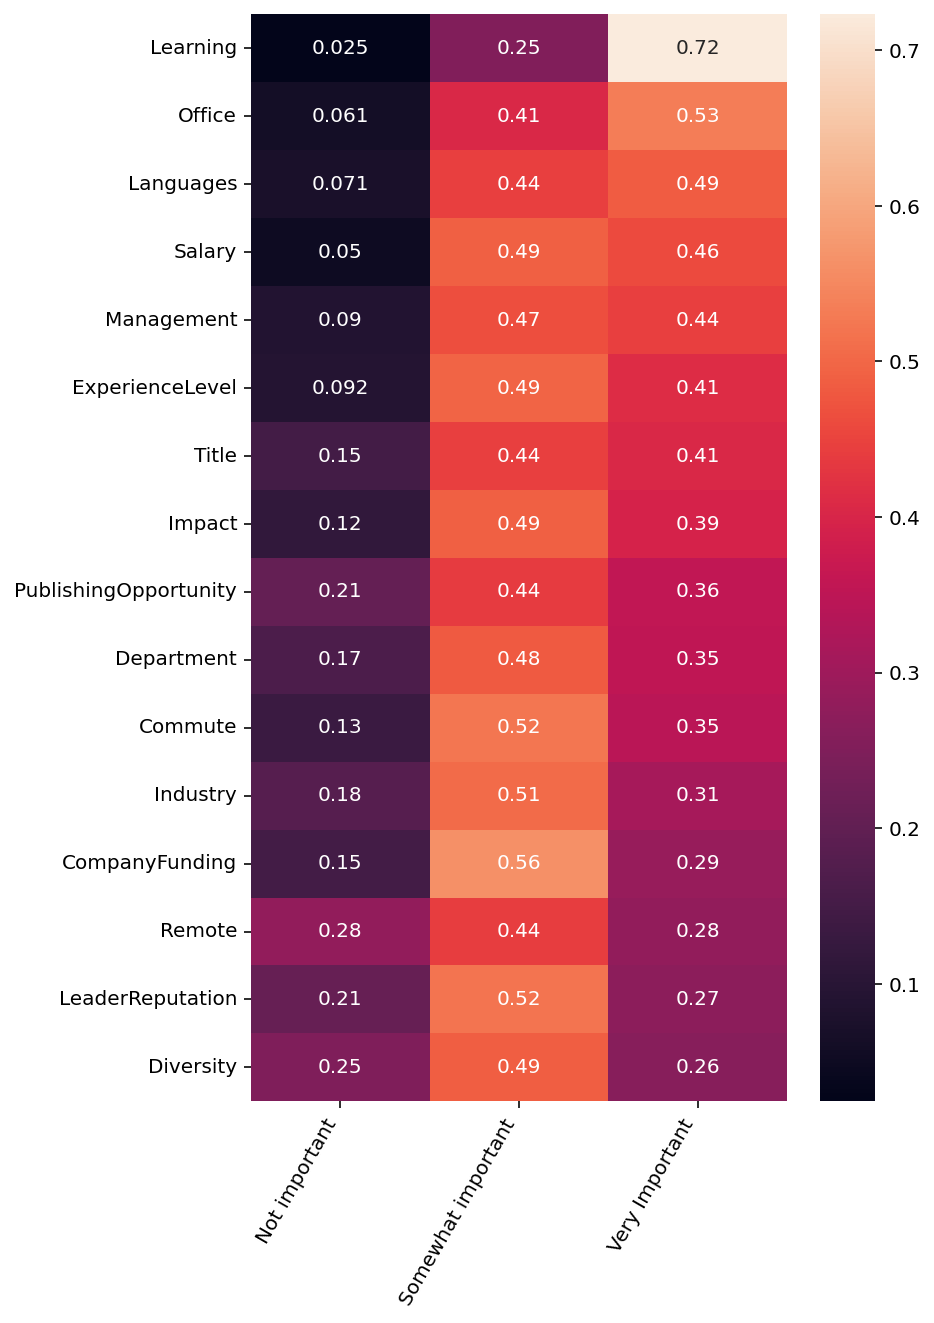

In [72]:
job_factors = [x for x in mcq.columns if x.find('JobFactor')!=-1]

jfdf = {}
for feature in job_factors:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

## 상관관계 - 배울 점 >> 회사 > 언어
plt.figure(figsize=(6,10))
plt.xticks(rotation=60, ha='right')
sns.heatmap(jfdf.sort_values('Very Important', 
                             ascending=False), annot=True)

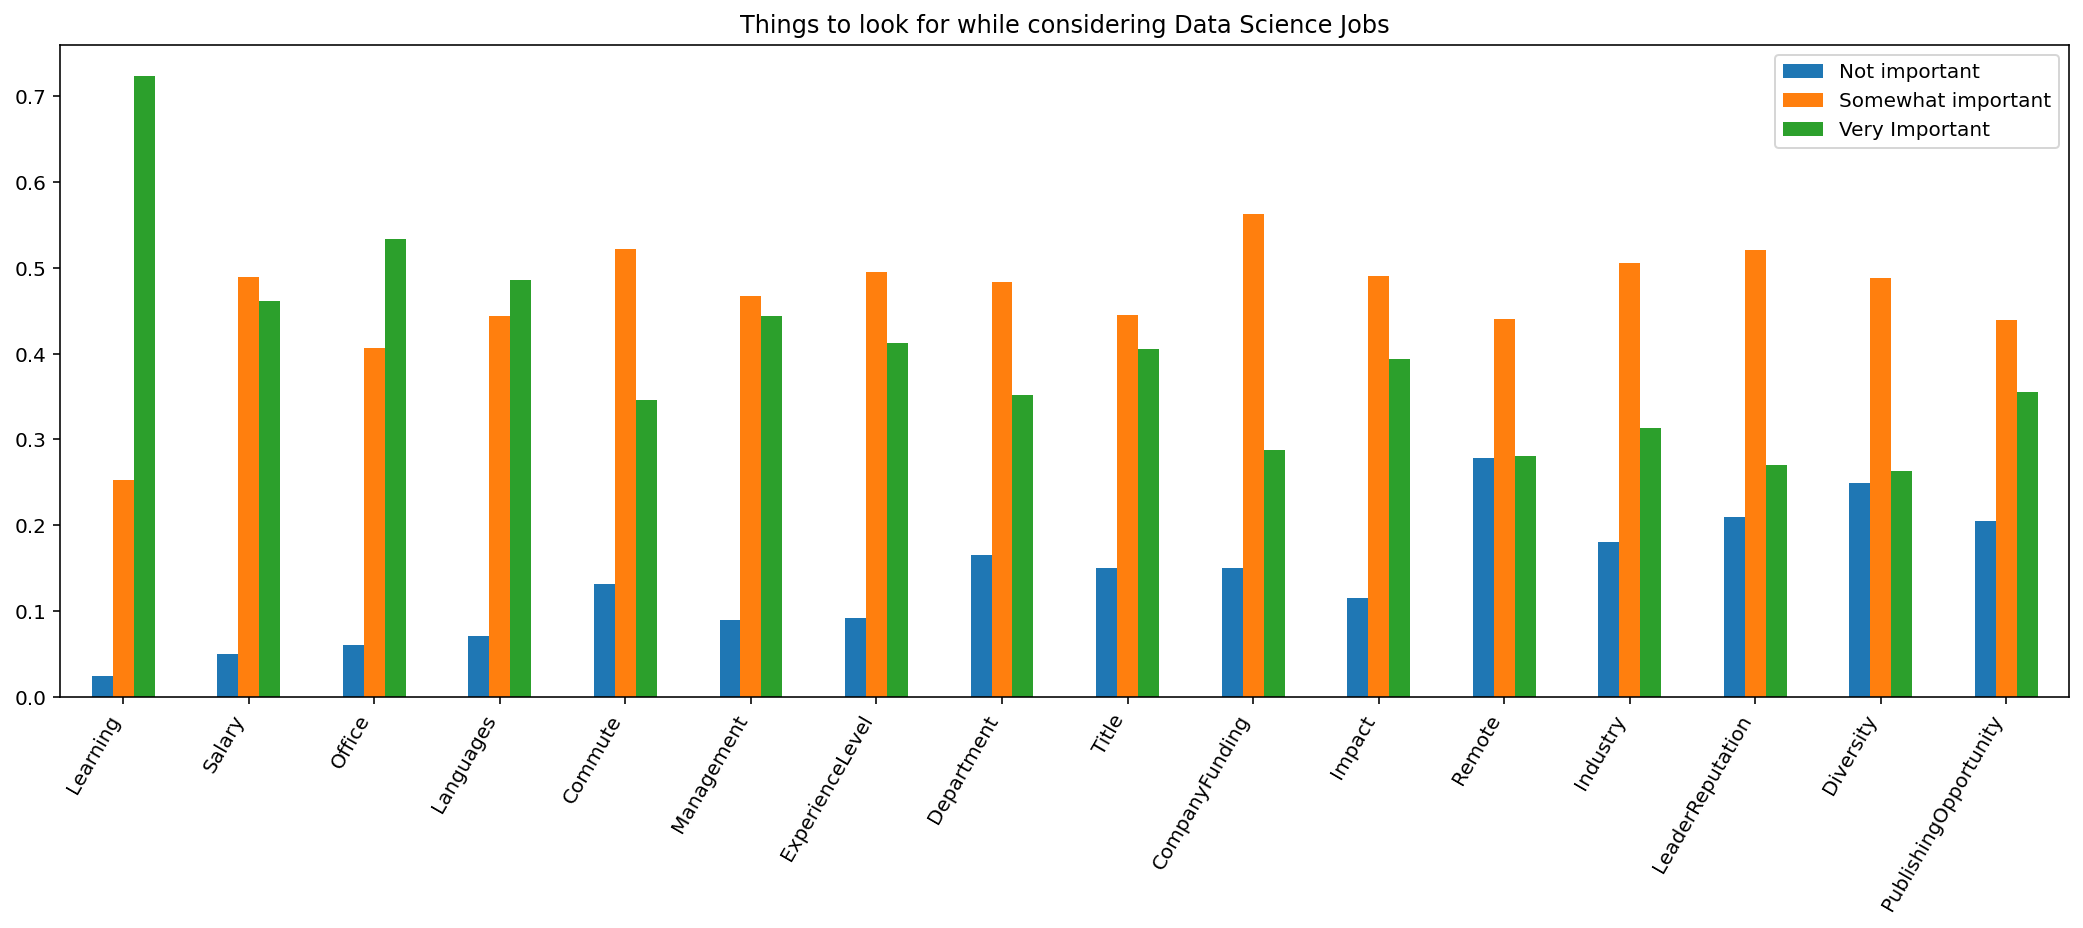

In [73]:
## barplot
jfdf.plot(kind='bar',figsize=(18,6),title="Things to look for while considering Data Science Jobs")
plt.xticks(rotation=60,ha='right')
plt.show()

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

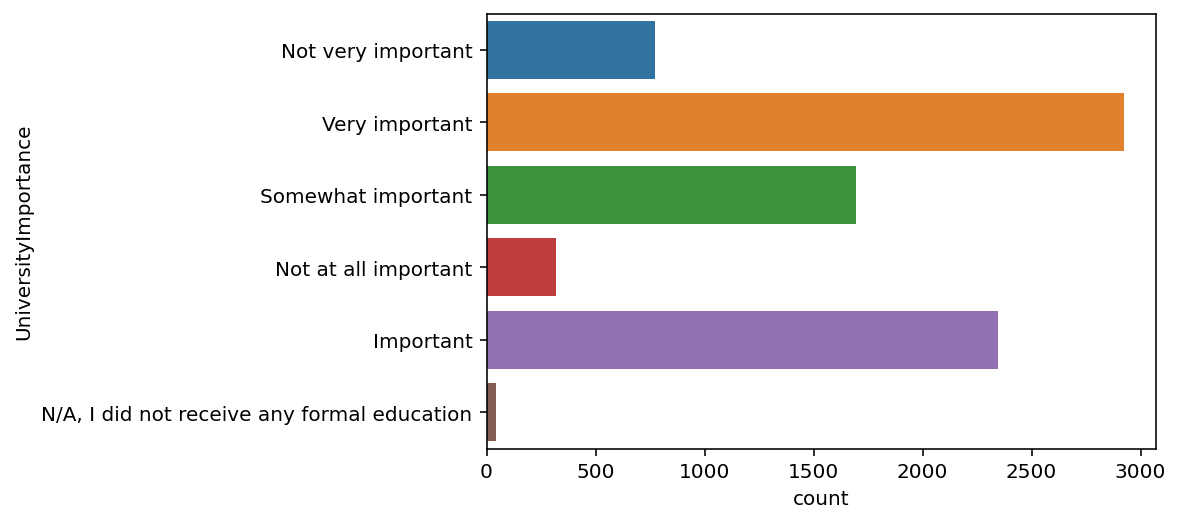

In [74]:
# 학위의 중요성 - 중요하다 대다수
sns.countplot(y='UniversityImportance', data=mcq)

In [75]:
## plotly 사용
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(mcq[(mcq['Age'].notnull())&(mcq['UniversityImportance'] == uni)]['Age'])
group_labels = top_uni.index

fig = fig_fact.create_distplot(top_uni_dist,group_labels)
py.iplot(fig, filename='University Importance by Age')

In [76]:
# 어디서부터 시작해야할지 - Online courses > Univ courses > self
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

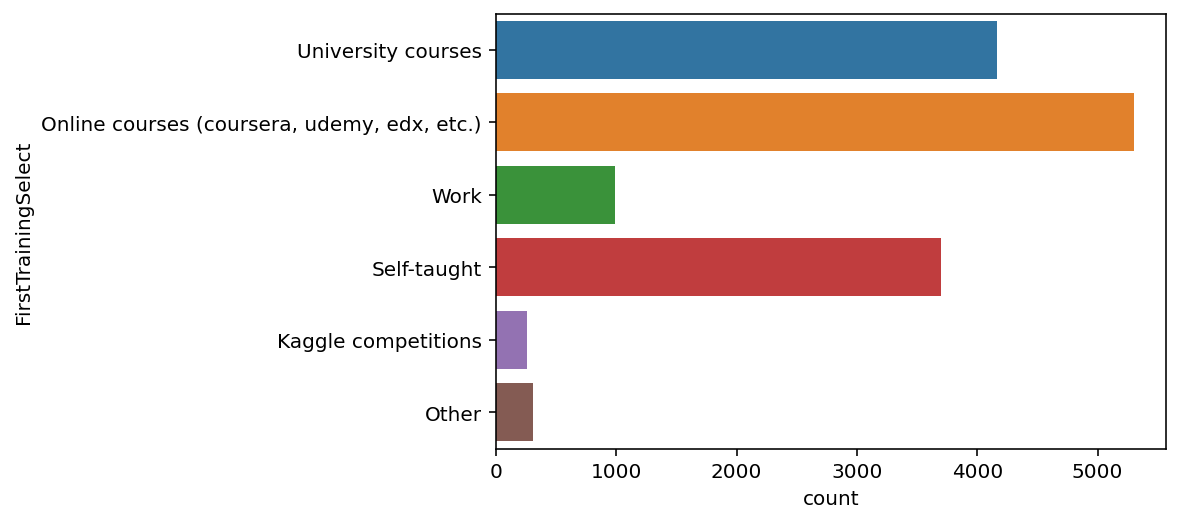

In [77]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

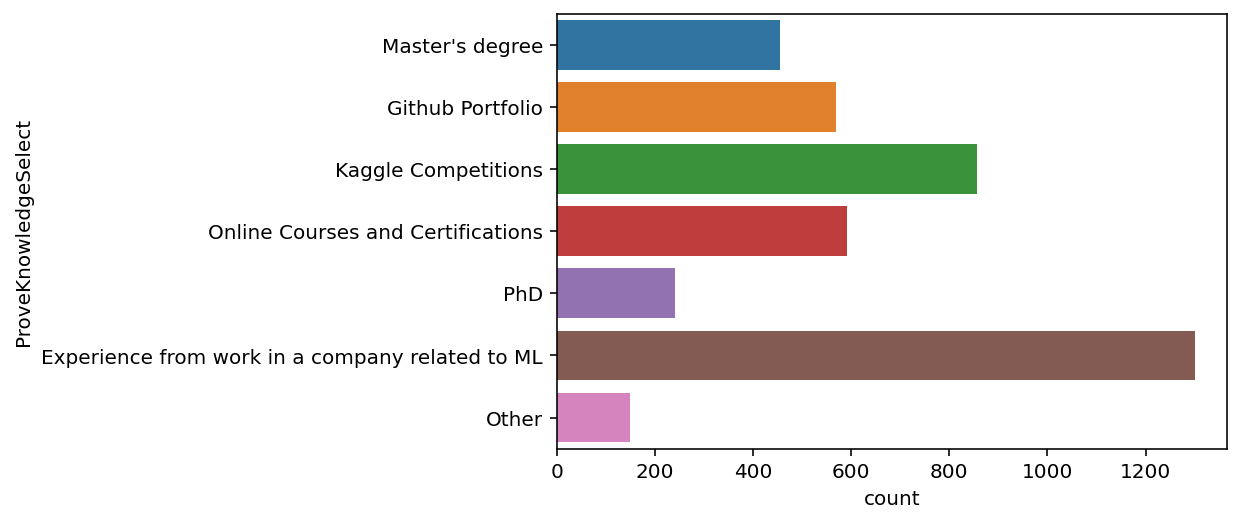

In [78]:
# 이력서에서 가장 중요한 것 - 직무 경험 >> 캐글 경진대회 결과
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

In [79]:
# 수학의 필요성 - 비전공자에게 설명할 정도라면 충분 >> 코드 짤수만 있으면 오케이
## 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [80]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

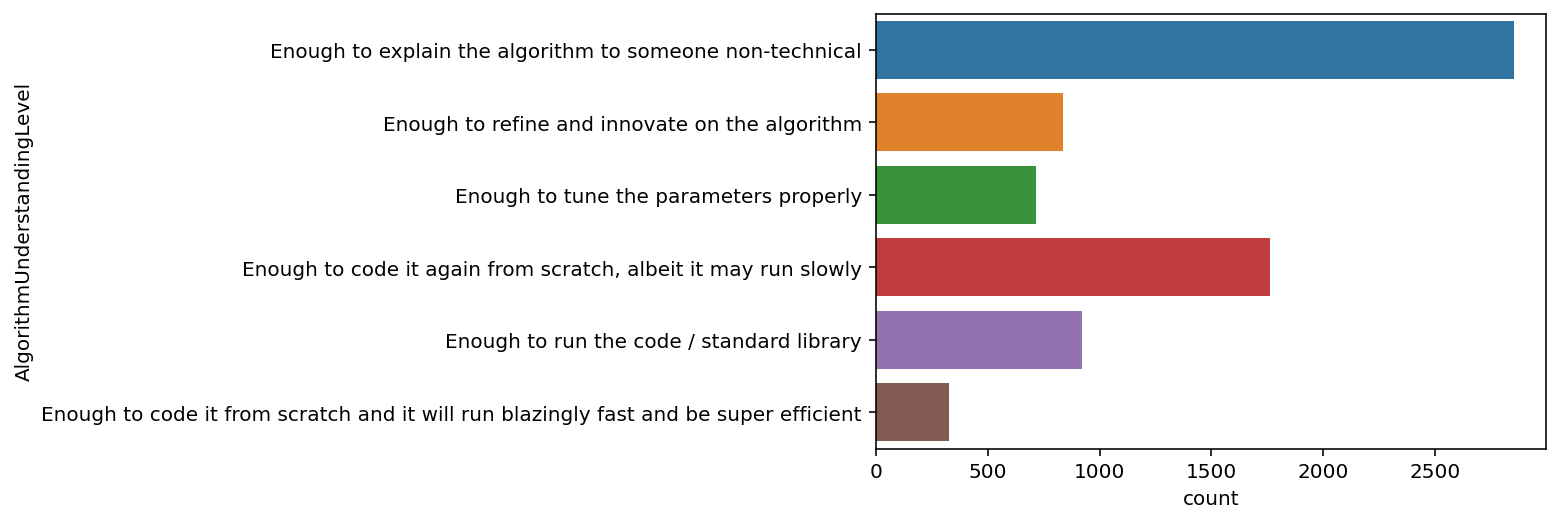

In [81]:
sns.countplot(y='AlgorithmUnderstandingLevel',data=mcq)

In [82]:
# 어디에서 일을 찾을지
## 설문내용과 누구에게 물어봤는지를 찾아봄
question.loc[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

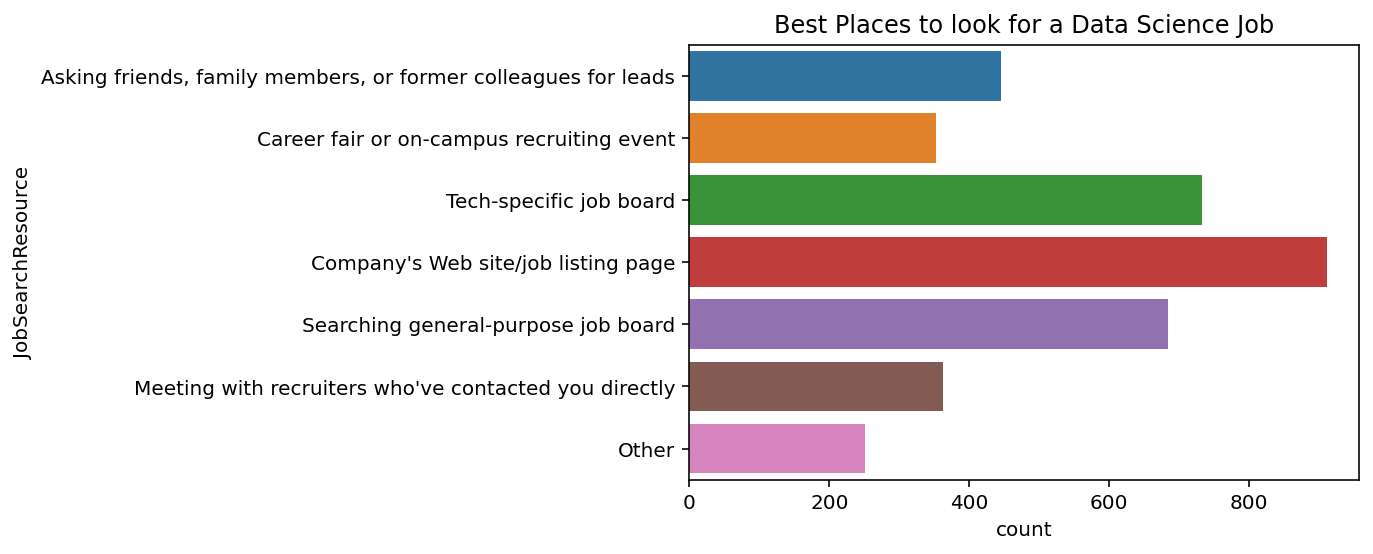

In [83]:
## 정보 제공하는 곳들 - 회사 웹사이트/구직사이트 >> 특정 채용게시판
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource',data=mcq)

<AxesSubplot:title={'center':'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

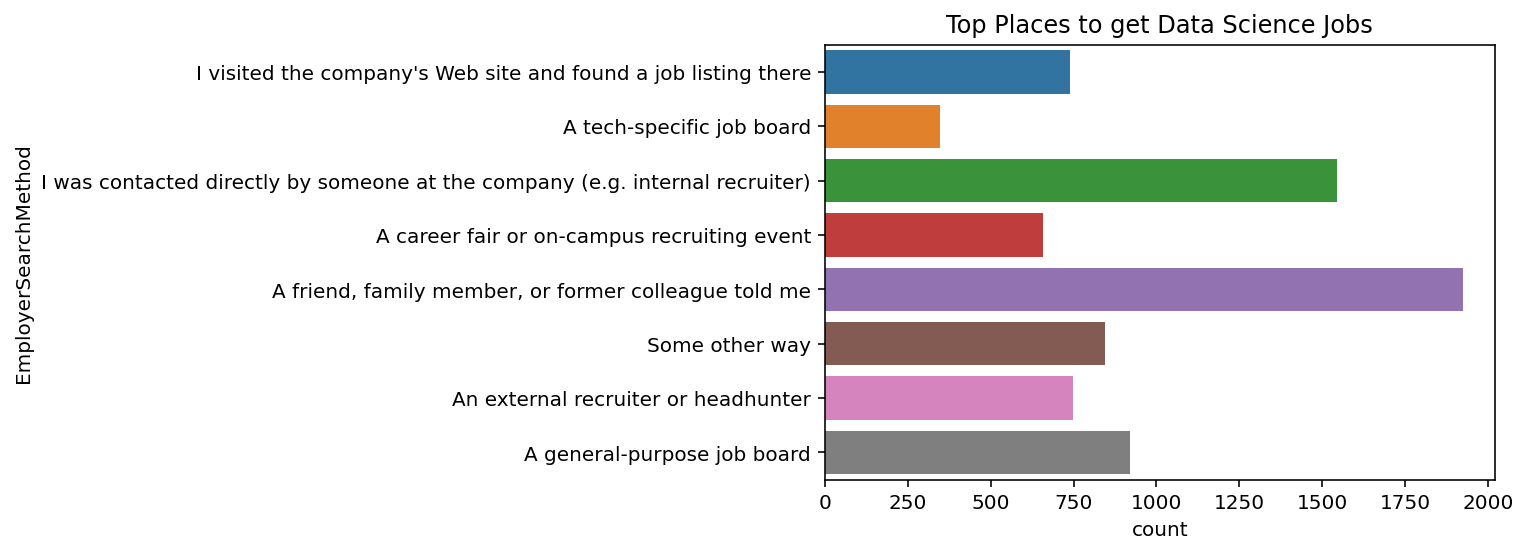

In [84]:
## 취업자들의 정보얻은 곳들 - 지인들 >> 내부 헤드헌터
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod',data=mcq)

<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

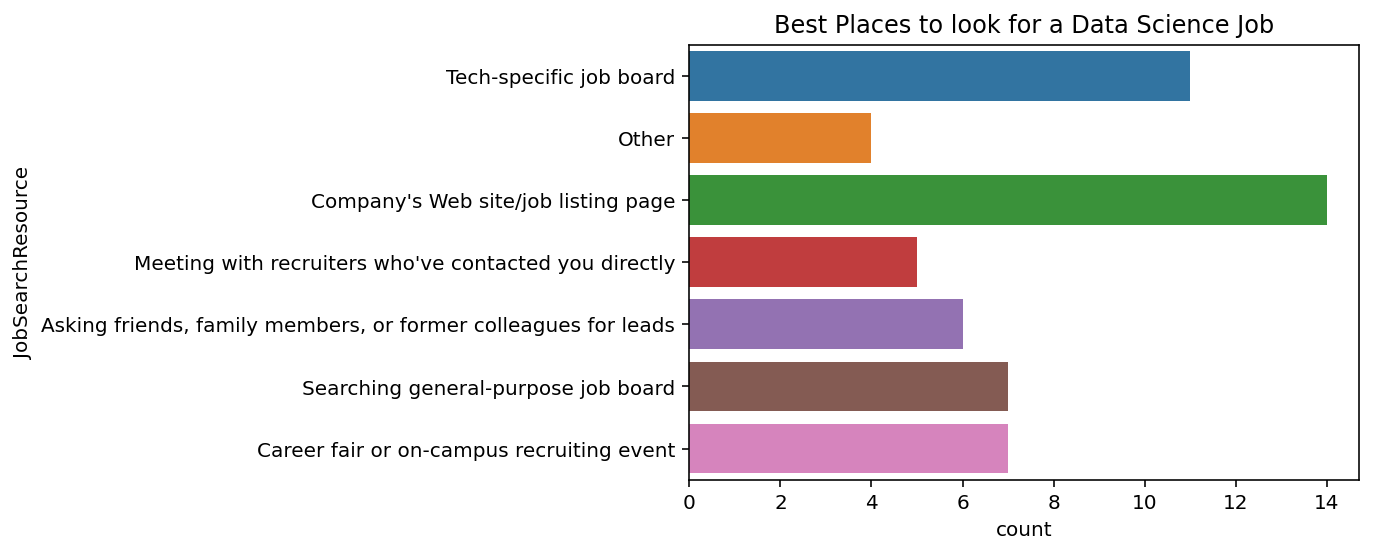

In [85]:
# 한국인들의 구인정보 찾는 곳들 - 웹사이트/구직사이트 > 특정 게시판
korea = mcq.loc[(mcq['Country']=='South Korea')]
plt.title("Best Places to look for a Data Science Job")
sns.countplot(y='JobSearchResource',data=korea)

<AxesSubplot:title={'center':'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

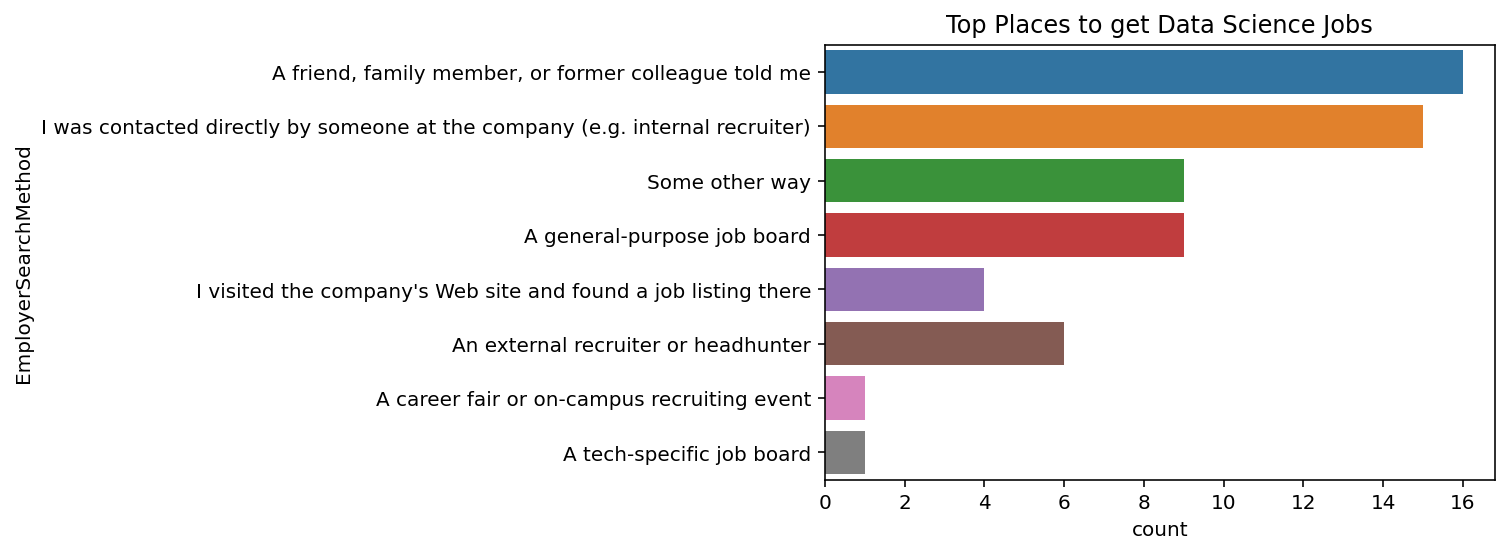

In [86]:
# 한국인 취업자들이 정보찾은 곳들 - 지인들 > 헤드헌터
plt.title("Top Places to get Data Science Jobs")
sns.countplot(y='EmployerSearchMethod',data=korea)

### 결론
- Python이 R보다 많이 사용된다. (통계학자들의 경우 R이 더 많이 사용된다.)
- 데이터 수집과 정제가 가장 어려운 일이다.
- 인기있는 학습 플랫폼, 블로그 등이 있다.
- 내년에 인기 있는 기술로는 딥러닝과 텐서플로우가 차지할 것이다.
- 급여는 남성이 여성보다 높다.
- 통계 혹은 IT 관련 전공자들이 많이 참여했다.